# Batch Segmentation Workflow Example

This notebook does batch processing for 3D nuclei image segmentation

Import packages:

In [1]:
import napari
from napari.utils import nbscreenshot
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes as nsbatwm
from napari_skimage_regionprops._regionprops import regionprops_table
import os
import pandas as pd

## Put workflow inside a function

This function, different from the one in the previous notebook, takes a path as input argument, instead of an image, and reads the image inside it.

It also measure objects properties, saves them and returns a labeled image.

In [2]:
def my_segmentation(file_path, output_path=None):
    """Apply custom 3D nuclei segmentation and save properties"""
    
    if output_path==None:
        output_path = os.path.split(file_path)[0]
    file_name = os.path.splitext(os.path.split(file_path)[1])[0]
    
    # Read image
    image0_n = imread(file_path)
    # Apply voronoi otsu labeling from nsbatwm
    image1_V = nsbatwm.voronoi_otsu_labeling(image0_n, 9.0, 3.0)
    # Remove labels touching edges
    image2_R = nsbatwm.remove_labels_on_edges(image1_V)
    # Measure properties
    df = pd.DataFrame(regionprops_table(image0_n, image2_R, shape = True))
    # Save propeties to disk
    df.to_csv(os.path.join(output_path, 'table_' + file_name + '.csv'))
    
    return image2_R

We define the relative path to our data here:

In [3]:
data_path = '../../data/3D'

## Run function on example image 

To test the function, we first get the path to an image by joining the folder_path (`data_path`) to the file name (`nuclei.tif`).

In [4]:
example_image_path = os.path.join(data_path, 'nuclei.tif')
example_image_path

'../../data/3D\\nuclei.tif'

Then, we read the image.

In [5]:
image0_n = imread(example_image_path)

And display it in napari.

In [6]:
viewer = napari.Viewer()
viewer.add_image(image0_n)

C:\Miniconda\envs\devbio-napari-env\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'image0_n' at 0x17b081cee50>

Apply function to example image and display results in napari.

INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'


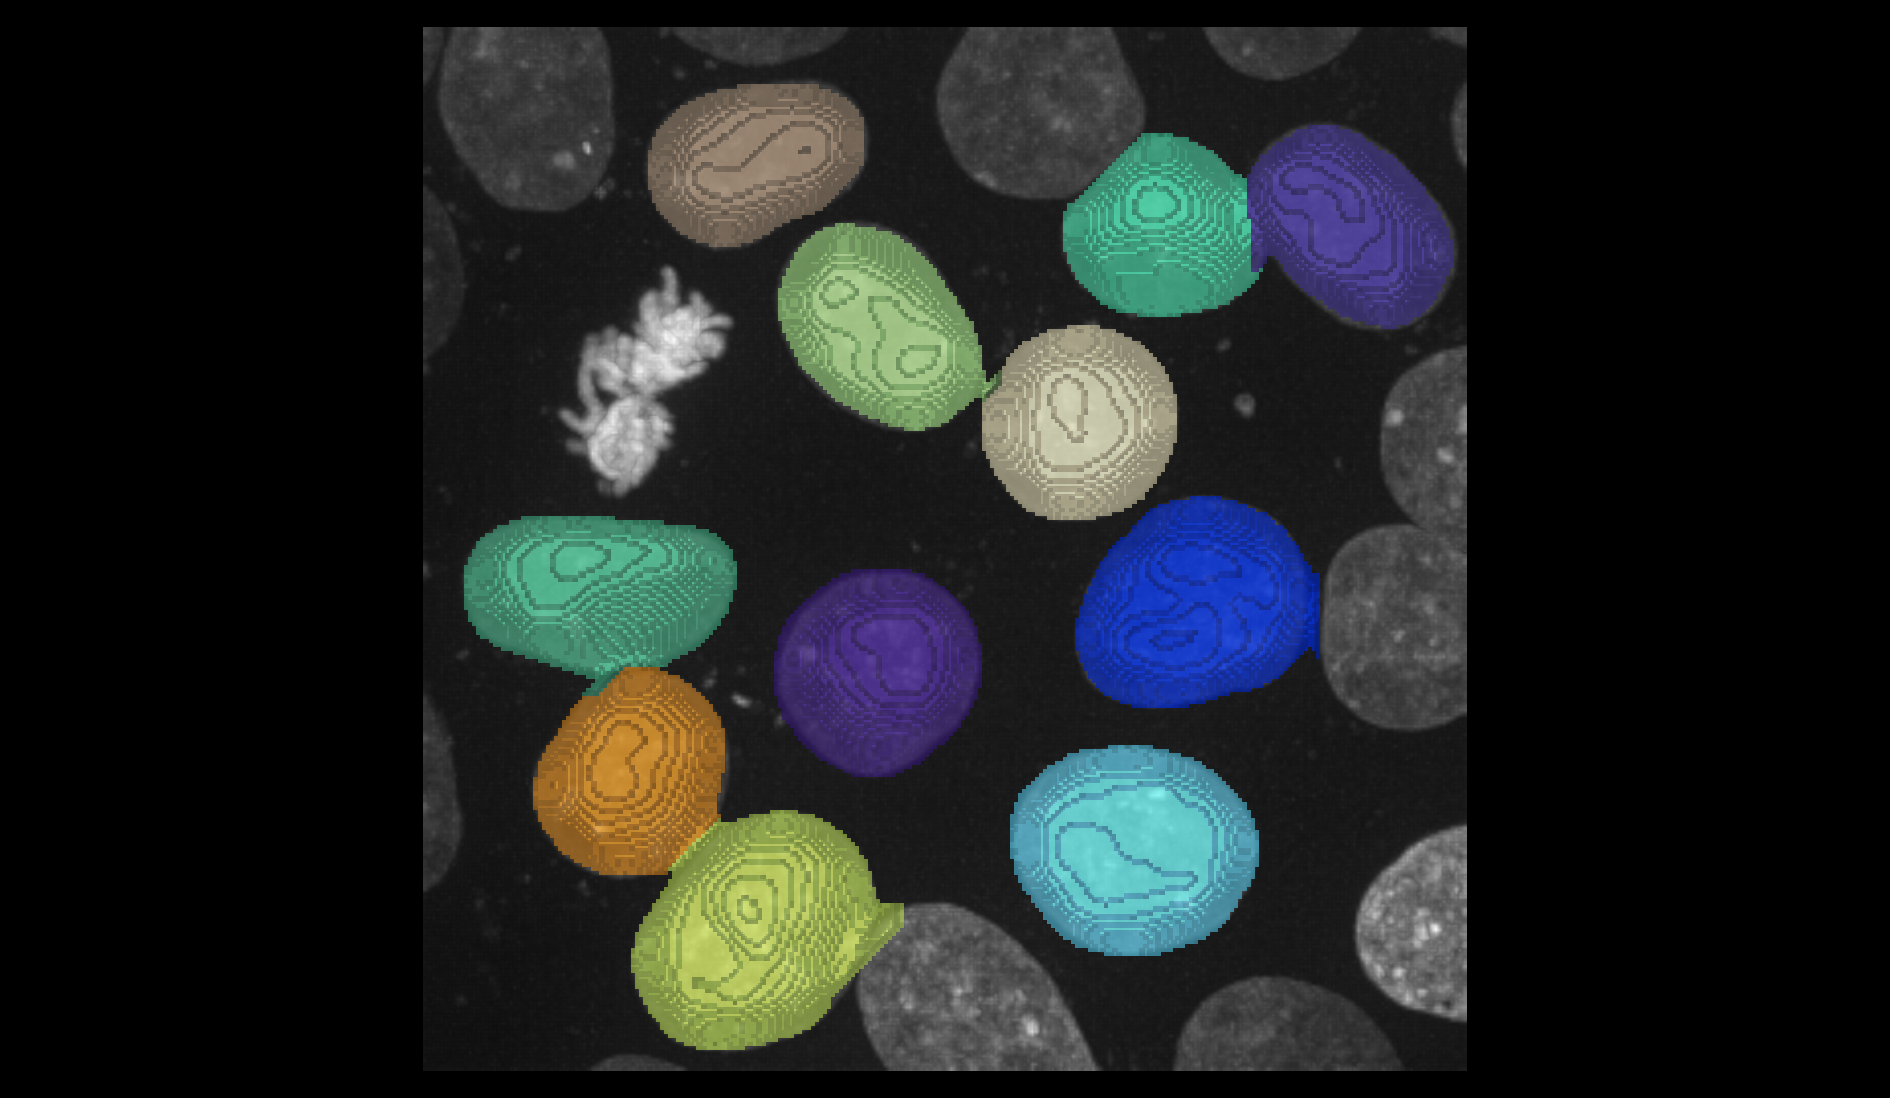

In [7]:
label_image = my_segmentation(example_image_path)

viewer.add_labels(label_image)

# Set the viewer to display 3D view
viewer.dims.ndisplay = 3

#Take a screenshot of the viewer and display in this cell
nbscreenshot(viewer, canvas_only = True)

## Batch processing

Now, a common next step would be to apply the same workflow to a folder of similar images in one shot, i.e., do batch processing.

Because the workflow is already placed inside a function, we can do that with a `for` loops and `if` statements.

The function `os.listdir` displays all file and folder names inside a path.

In [8]:
os.listdir(data_path)

['nuclei.tif',
 'nuclei_cropped.tif',
 'table_nuclei.csv',
 'table_nuclei_cropped.csv']

In [9]:
# Go through file names in folder 'data_path'
for file_name in os.listdir(data_path):
    # Check if the file is an image by looking if the file name ends with '.tif'
    if file_name.endswith('.tif'):
        # Joins folder path to file name and extension
        file_path = os.path.join(data_path, file_name)
        # Apply function to specified file path
        label_image = my_segmentation(file_path)

## Exercise

Modify the function to also save each labeled image to disk with the same name as the original image + '_labels'.

*Hint*: you will also need an extra condition inside the for loop to avoid processing the labeled images as input.